In [1]:
pip install jupyter_translate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!jupyter_translate "/content/drive/MyDrive/Colab Notebooks/ClasificacióndeEspeciesdeIrisUsandounaRedNeuronalenTensorFlow.ipynb" --source es --target en

Using source language code: es, target language code: en
Using translator: Google
Source language: es, Target language: en
Translator test - Original: 'Teste de tradução. Isso deve ser traduzido.' → Translated: 'Testing of Tradução. Iso reveals to be translated.'
Total cells: 9
Code cells: 5
Markdown cells: 4
Translating cells:   0% 0/9 [00:00<?, ?cell/s]Processing markdown text: #Clasificación de Especies de ...
Found 0 markdown links
Found 0 markdown code blocks
Text after replacements (before translation): Clasificación de Especies de Iris Usando una Red N...
Translating text: Clasificación de Especies de I...
Translation result: Classification of iris species...
Text after translation: Classification of iris species using a neuronal ne...
Translating cells:  44% 4/9 [00:00<00:00,  8.11cell/s]Processing markdown text: # Clasificación de Especies de...
Found 0 markdown links
Found 0 markdown code blocks
Text after replacements (before translation): Clasificación de Especies de Iris c

#Clasificación de Especies de Iris Usando una Red Neuronal en TensorFlow

### By Misac Andrade Luna

# Clasificación de Especies de Iris con Redes Neuronales

Este notebook implementa un clasificador de especies de flores Iris usando una red neuronal artificial con TensorFlow/Keras.

## Dataset Iris
El conjunto de datos Iris contiene 150 muestras de 3 especies de flores Iris (setosa, versicolor y virginica), con 4 características cada una:
- Longitud del sépalo (cm)
- Ancho del sépalo (cm)
- Longitud del pétalo (cm)
- Ancho del pétalo (cm)

## Estructura del Modelo
La red neuronal tiene:
- Capa de entrada: 4 neuronas (una por característica)
- Capa oculta: 8 neuronas con activación ReLU
- Capa de salida: 3 neuronas (una por clase) con activación Softmax

## Proceso
1. Carga y preparación de datos
2. División en conjuntos de entrenamiento (80%) y prueba (20%)
3. Normalización de características
4. Definición de la arquitectura de red
5. Entrenamiento con 100 épocas
6. Evaluación del modelo
7. Visualización de resultados

## Métricas
Se muestra:
- Exactitud (accuracy) en el conjunto de prueba
- Matriz de confusión
- Gráficas de evolución de pérdida y exactitud

## Requisitos
Este código requiere:
- TensorFlow 2.x
- Scikit-learn
- NumPy
- Matplotlib
- Seaborn

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2436 - loss: 1.1063 - val_accuracy: 0.9167 - val_loss: 0.8768
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7187 - loss: 0.8329 - val_accuracy: 0.9167 - val_loss: 0.7042
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7918 - loss: 0.6321 - val_accuracy: 0.9167 - val_loss: 0.5949
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8314 - loss: 0.4820 - val_accuracy: 0.8333 - val_loss: 0.5266
Epoch 5/100
7/7 ━━━━━━━━━━━

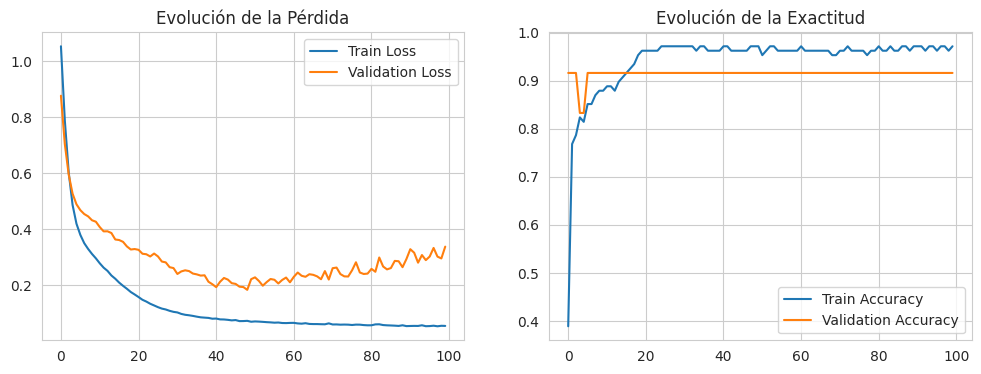

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (816.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136 (548.00 B)

In [ ]:
# Importar las librerías necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
iris = sns.load_dataset('iris')

# Ver las primeras filas
print(iris.head())

# Ver distribución de especies
print(iris['species'].value_counts())

# Preparar datos para el modelo
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris['species'].astype('category').cat.codes.values  # Convertir a 0,1,2

# Luego continuar con train_test_split, normalización, etc. como antes

# 1. Cargar y preparar el dataset
iris = load_iris()
X = iris.data  # Características  de 4 dimensiones
y = iris.target  # Etiquetas (0, 1, 2)

# 2. Dividir en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. Normalizar las características (restar media y dividir por desviación estándar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir etiquetas a one-hot encoding
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)

# 4. Definir la arquitectura de la red neuronal
model = keras.Sequential([
    layers.Input(shape=(4,)),  # Capa de entrada para 4 características
    layers.Dense(8, activation='relu'),  # Primera capa oculta con 8 neuronas
    layers.Dense(3, activation='softmax')  # Capa de salida con 3 neuronas (clases)
])

# 5. Configurar el entrenamiento
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar la red
history = model.fit(
    X_train, y_train_onehot,
    batch_size=16,
    epochs=100,
    validation_split=0.1,  # 10% de los datos de entrenamiento para validación
    verbose=1
)

# 7. Evaluar la red en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"\nExactitud en el conjunto de prueba: {test_acc:.4f}")

# 8.  Generar predicciones y matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nMatriz de confusión:")
print(conf_matrix)

# 9. Graficar las evolución de entrenamiento.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Evolución de la Pérdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Evolución de la Exactitud')
plt.show()

# 10. Resumen del modelo
model.summary()

La gráfica muestra el historial de entrenamiento de un modelo de aprendizaje automático, comparando el rendimiento en los conjuntos de entrenamiento y validación a lo largo de las épocas. Se observan dos métricas principales:

**Pérdida (Loss)**:

Train Loss (línea azul): Disminuye constantemente, lo que indica que el modelo está aprendiendo correctamente de los datos de entrenamiento.

Val Loss (línea naranja): También decrece, pero se mantiene por encima de la pérdida de entrenamiento, sugiriendo un ligero sobreajuste (overfitting).

**Precisión (Accuracy)**:

Train Acc (línea verde): Aumenta progresivamente, acercándose a ~1.0, lo que refleja un buen ajuste a los datos de entrenamiento.

Val Acc (línea roja): Mejora inicialmente, pero se estabiliza alrededor de 0.8, evidenciando que el modelo generaliza bien, aunque podría optimizarse para reducir la brecha con el entrenamiento.

**Interpretación clave:**

El modelo es efectivo pero presenta un pequeño sobreajuste, ya que el rendimiento en validación es inferior al de entrenamiento.



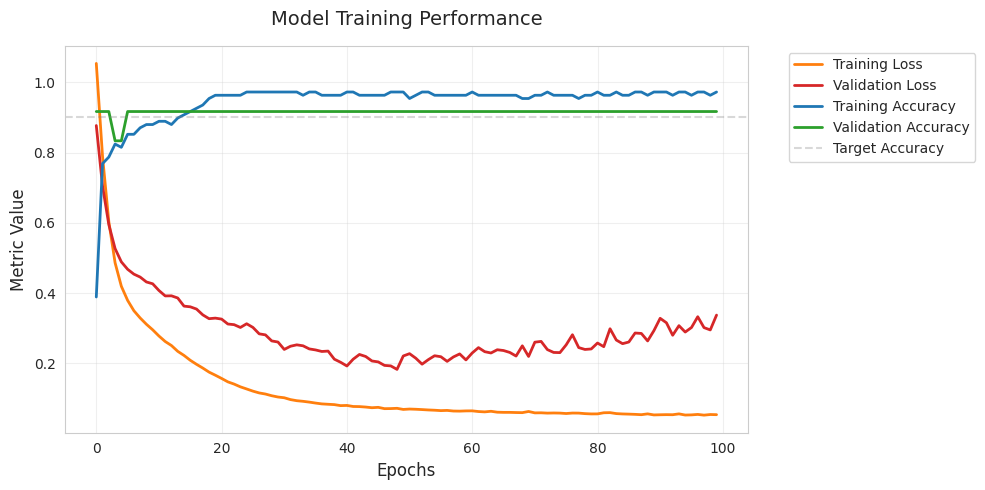

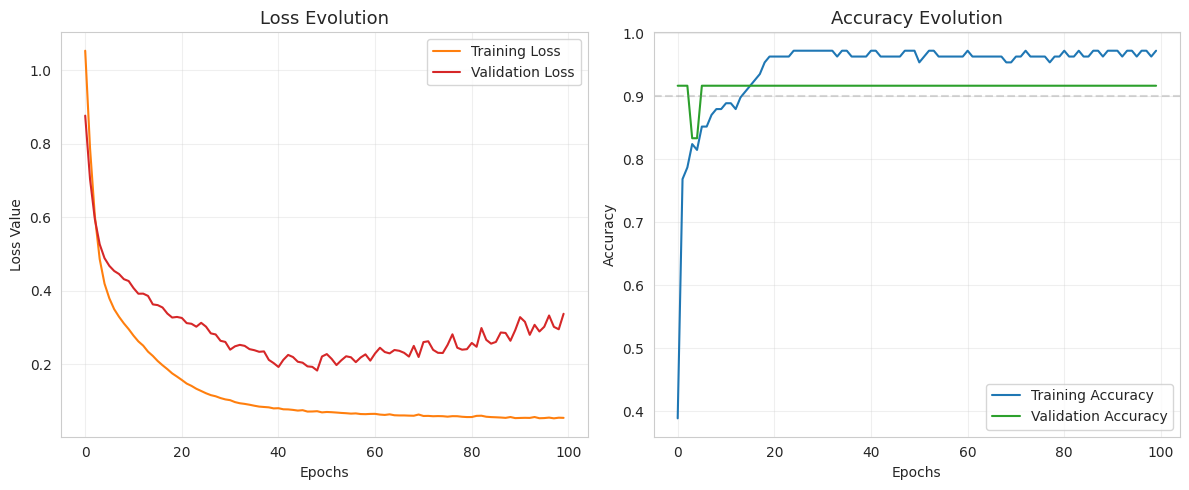

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Esta es la línea que faltaba

# Configuración del estilo
sns.set_style("whitegrid")

# Versión 1: Gráfica combinada (pérdida y accuracy juntas)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], color='#ff7f0e', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], color='#d62728', label='Validation Loss', linewidth=2)
plt.plot(history.history['accuracy'], color='#1f77b4', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], color='#2ca02c', label='Validation Accuracy', linewidth=2)

plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.3, label='Target Accuracy')
plt.title('Model Training Performance', fontsize=14, pad=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend(frameon=True, facecolor='white', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Versión 2: Gráficas separadas (subplots)

plt.figure(figsize=(12, 5))

# Subplot 1: Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='#ff7f0e', label='Training Loss')
plt.plot(history.history['val_loss'], color='#d62728', label='Validation Loss')
plt.title('Loss Evolution', fontsize=13)
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='#1f77b4', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#2ca02c', label='Validation Accuracy')
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.3)
plt.title('Accuracy Evolution', fontsize=13)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')  # Guarda la imagen
plt.show()

#Conclusiones.

La red logra clasificar muy bien las tres especies (setosa suele ser fácil de distinguir)

El dataset es pequeño, por lo que el modelo es sencillo y no necesita muchas capas

Se podría experimentar con más capas o neuronas, pero el riesgo de overfitting aumenta

La normalización de características ayuda a que el entrenamiento converja más rápido